In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/dataset3'

/content/drive/MyDrive/dataset3


In [3]:
!unzip -qq '/content/drive/MyDrive/dataset3/model_1s_over.zip'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Flatten, BatchNormalization
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.utils.np_utils import to_categorical

# b

In [17]:
data_total  = pd.read_csv('/content/drive/MyDrive/dataset3/total_band.csv', header=None)

In [18]:
data_total

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-0.031820,-0.015874,-0.001172,0.011249,0.020713,0.026974,0.030190,0.030831,0.029559,0.027102,...,-0.035003,-0.034647,-0.033418,-0.031305,-0.028545,-0.025565,-0.022868,-0.020891,-0.019891,1.0
1,0.401977,0.381335,0.353735,0.319320,0.278790,0.233424,0.184983,0.135520,0.087119,0.041629,...,0.268145,0.286128,0.304299,0.322373,0.339934,0.356470,0.371414,0.384183,0.394201,1.0
2,-0.019872,-0.020594,-0.021637,-0.022515,-0.022798,-0.022202,-0.020644,-0.018236,-0.015233,-0.011971,...,-0.072854,-0.070401,-0.067539,-0.064716,-0.062285,-0.060443,-0.059208,-0.058448,-0.057940,1.0
3,0.400917,0.403804,0.402367,0.396151,0.384771,0.367941,0.345523,0.317577,0.284411,0.246605,...,0.169533,0.188411,0.208027,0.227756,0.247033,0.265431,0.282711,0.298819,0.313845,1.0
4,-0.057454,-0.056822,-0.055984,-0.054985,-0.053945,-0.052999,-0.052250,-0.051733,-0.051414,-0.051213,...,-0.059447,-0.057278,-0.056011,-0.055424,-0.055246,-0.055239,-0.055275,-0.055352,-0.055577,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,-0.050435,-0.047843,-0.044973,-0.042221,-0.040007,-0.038694,-0.038512,-0.039513,-0.041550,-0.044289,...,-0.054704,-0.052600,-0.050564,-0.048774,-0.047331,-0.046216,-0.045292,-0.044332,-0.043089,100.0
35996,0.022090,0.024929,0.027786,0.031100,0.035075,0.039622,0.044402,0.048933,0.052740,0.055510,...,-0.053679,-0.057318,-0.059515,-0.061043,-0.062554,-0.064528,-0.067243,-0.070758,-0.074902,100.0
35997,-0.041365,-0.039069,-0.036238,-0.033035,-0.029705,-0.026536,-0.023804,-0.021728,-0.020455,-0.020042,...,-0.086279,-0.149944,-0.197480,-0.223854,-0.227829,-0.211824,-0.181055,-0.142239,-0.102183,100.0
35998,-0.079288,-0.083358,-0.086464,-0.087995,-0.087513,-0.084880,-0.080336,-0.074488,-0.068211,-0.062467,...,-0.066882,-0.067113,-0.068424,-0.070704,-0.073600,-0.076563,-0.078930,-0.080050,-0.079413,100.0


In [19]:
data_total=data_total.sample(frac=1)

In [20]:
data_train=data_total.iloc[0:24000, :]
data_val=data_total.iloc[24000:30000, :]
data_test=data_total.iloc[30000:36000,:]

In [21]:
y_train = to_categorical(data_train[256])
y_test = to_categorical(data_test[256])
y_val = to_categorical(data_val[256])

In [22]:
data_train.drop([256], axis=1, inplace=True)
data_test.drop([256], axis=1, inplace=True)
data_val.drop([256], axis=1, inplace=True)
data_train

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
3376,-0.035201,-0.027292,-0.020745,-0.016150,-0.013639,-0.012905,-0.013308,-0.014043,-0.014335,-0.013610,...,-0.009883,-0.003722,0.003468,0.011072,0.018524,0.025352,0.031175,0.035679,0.038593,0.039700
15686,-0.085018,-0.079061,-0.072203,-0.065248,-0.059021,-0.054241,-0.051409,-0.050739,-0.052138,-0.055235,...,0.177491,0.203811,0.206896,0.183082,0.133255,0.063131,-0.017513,-0.096578,-0.161980,-0.204039
10595,-0.091266,-0.089538,-0.087397,-0.085128,-0.083026,-0.081360,-0.080334,-0.080052,-0.080484,-0.081457,...,-0.077025,-0.074107,-0.075210,-0.081678,-0.093958,-0.111019,-0.129951,-0.145937,-0.152760,-0.143849
15697,-0.055386,-0.054763,-0.056579,-0.061816,-0.070721,-0.082439,-0.094810,-0.104459,-0.107239,-0.099035,...,0.134943,0.143179,0.150809,0.158198,0.165718,0.173599,0.181786,0.189863,0.197061,0.202371
19095,0.271081,0.260588,0.247304,0.231236,0.212447,0.191093,0.167453,0.141936,0.115063,0.087427,...,-0.169147,-0.169897,-0.168210,-0.164484,-0.159387,-0.153659,-0.147904,-0.142443,-0.137253,-0.132022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34671,-0.063562,-0.058606,-0.053849,-0.049796,-0.046645,-0.044309,-0.042535,-0.041042,-0.039656,-0.038379,...,-0.083232,-0.084626,-0.084632,-0.083130,-0.080233,-0.076287,-0.071826,-0.067468,-0.063783,-0.061145
16038,0.031355,0.032940,0.034723,0.036851,0.039403,0.042419,0.045969,0.050211,0.055423,0.061967,...,-0.073775,-0.084135,-0.090244,-0.091818,-0.089307,-0.083955,-0.077702,-0.072904,-0.071867,-0.076266
8183,0.157195,0.154331,0.132717,0.094674,0.045311,-0.008408,-0.058977,-0.099748,-0.126086,-0.136038,...,0.091988,0.093220,0.092439,0.090212,0.087331,0.084640,0.082870,0.082476,0.083529,0.085685
20312,-0.037312,-0.038402,-0.040190,-0.042437,-0.044983,-0.047756,-0.050718,-0.053799,-0.056850,-0.059651,...,-0.064434,-0.069102,-0.073003,-0.074810,-0.073617,-0.069082,-0.061423,-0.051293,-0.039586,-0.027254


In [23]:
X_train=data_train.values
X_test=data_test.values
X_val=data_val.values

In [24]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(24000, 256)
(6000, 256)
(6000, 256)
(24000, 101)
(6000, 101)
(6000, 101)


In [25]:
X_train = X_train.reshape(24000, 256, 1)
X_test = X_test.reshape(6000, 256, 1)
X_val = X_val.reshape(6000, 256, 1)
X_train.shape, X_test.shape, X_val.shape

((24000, 256, 1), (6000, 256, 1), (6000, 256, 1))

In [26]:
def model():
  model = Sequential()
  model.add(Conv1D(256, 8, padding='same', activation='relu', input_shape= (256,1)))
  model.add(MaxPooling1D())
  model.add(Conv1D(256, 8, padding='same', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same',activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(101, activation='softmax')) # activation='softmax'

  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [27]:
model = model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 256, 256)          2304      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 128, 256)         0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 128, 256)          524544    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 64, 256)          0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 64, 64)            131136    
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 32, 64)          

In [28]:
history = model.fit(X_train, y_train, batch_size = 450, epochs = 500, verbose = 1, validation_data=(X_val, y_val))

Epoch 1/500
54/54 [==============================] - 14s 84ms/step - loss: 0.0097 - accuracy: 0.0327 - val_loss: 0.0098 - val_accuracy: 0.0265
Epoch 2/500
54/54 [==============================] - 4s 75ms/step - loss: 0.0089 - accuracy: 0.1915 - val_loss: 0.0097 - val_accuracy: 0.0352
Epoch 3/500
54/54 [==============================] - 4s 75ms/step - loss: 0.0071 - accuracy: 0.4237 - val_loss: 0.0098 - val_accuracy: 0.0735
Epoch 4/500
54/54 [==============================] - 4s 76ms/step - loss: 0.0049 - accuracy: 0.6502 - val_loss: 0.0086 - val_accuracy: 0.2233
Epoch 5/500
54/54 [==============================] - 4s 76ms/step - loss: 0.0027 - accuracy: 0.8228 - val_loss: 0.0063 - val_accuracy: 0.5842
Epoch 6/500
54/54 [==============================] - 4s 77ms/step - loss: 0.0014 - accuracy: 0.9119 - val_loss: 0.0042 - val_accuracy: 0.7470
Epoch 7/500
54/54 [==============================] - 4s 77ms/step - loss: 8.6746e-04 - accuracy: 0.9506 - val_loss: 0.0019 - val_accuracy: 0.9092
E

In [29]:
model.save('bandpass.h5')

In [30]:
model.evaluate(X_test, y_test)

188/188 [==============================] - 1s 5ms/step - loss: 2.3666e-04 - accuracy: 0.9858


[0.00023665817570872605, 0.9858333468437195]

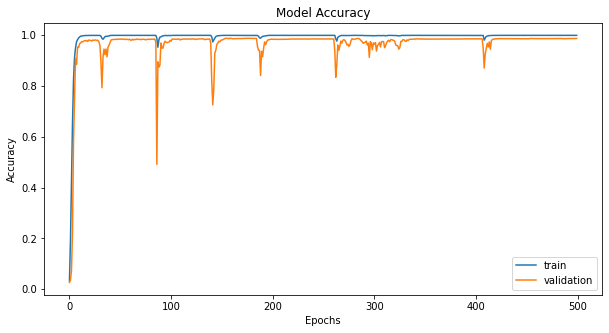

In [31]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.show()

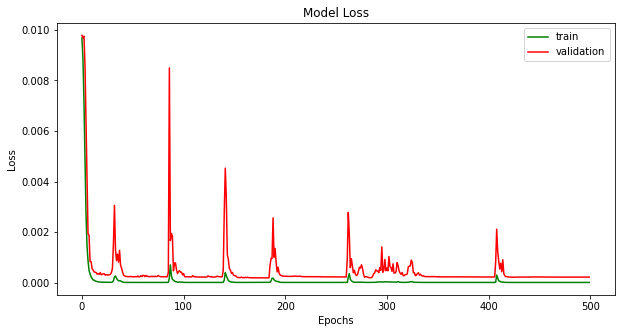

In [32]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], color = 'g')
plt.plot(history.history['val_loss'], color = 'r')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# h

In [33]:
data_total = pd.read_csv('/content/drive/MyDrive/dataset3/total_high.csv', header=None)

In [34]:
data_total=data_total.sample(frac=1)

In [35]:
data_train=data_total.iloc[0:24000, :]
data_val=data_total.iloc[24000:30000, :]
data_test=data_total.iloc[30000:36000,:]

In [36]:
y_train = to_categorical(data_train[256])
y_test = to_categorical(data_test[256])
y_val = to_categorical(data_val[256])

In [37]:
data_train.drop([256], axis=1, inplace=True)
data_test.drop([256], axis=1, inplace=True)
data_val.drop([256], axis=1, inplace=True)
data_train

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
10399,0.058111,0.072486,0.085933,0.075479,0.046317,0.121755,0.131583,0.137532,0.087362,0.126442,...,-0.014846,-0.004027,-0.024368,-0.005119,0.002210,-0.028860,-0.044050,-0.017429,0.007952,-0.008367
14270,0.082531,0.074976,0.070924,0.115074,0.113916,0.125021,0.131767,0.136617,0.129218,0.168842,...,-0.092714,-0.032243,-0.070572,-0.076960,-0.061208,-0.079256,-0.019644,-0.100051,-0.099587,-0.099114
17232,-0.020834,-0.018265,-0.024066,-0.085977,-0.076298,-0.192019,-0.164360,-0.177861,-0.169303,-0.208494,...,-0.104804,-0.115468,-0.098732,-0.093538,-0.083725,-0.085963,-0.093803,-0.050664,-0.066546,-0.028619
35176,0.277963,0.256907,0.230462,0.244117,0.245392,0.192268,0.168984,0.159130,0.120226,0.114192,...,-0.066169,-0.038260,-0.109141,-0.059762,-0.042453,-0.088184,-0.125016,-0.065887,-0.062548,-0.069550
7435,-0.473105,-0.465516,-0.467742,-0.454823,-0.466939,-0.436191,-0.451018,-0.464271,-0.445389,-0.445552,...,0.031755,0.038696,0.037860,-0.027724,-0.006054,-0.006252,-0.024897,-0.001999,-0.015128,-0.038804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35020,-0.079915,-0.094212,-0.106139,-0.091465,-0.064602,-0.104518,-0.132114,-0.096231,-0.091227,-0.106383,...,-0.059178,-0.014550,-0.028403,-0.013345,-0.027658,-0.006011,-0.043974,-0.072377,-0.025910,-0.017363
3334,-0.018189,0.001442,0.001965,0.000662,-0.045829,0.008583,-0.013402,-0.017795,-0.027914,-0.045021,...,0.037916,0.031916,0.043294,0.023193,0.026930,0.033367,0.003844,0.058420,0.031925,0.030860
27718,0.060280,0.021865,0.068719,0.099414,0.036218,0.055823,0.078758,0.043963,0.058138,0.071392,...,0.141564,0.124194,0.070503,0.098152,0.050841,0.064440,0.057668,0.007857,0.038405,0.024064
28883,0.352842,0.445189,0.503424,0.449359,0.481774,0.517488,0.464211,0.478314,0.492806,0.456268,...,-0.031298,-0.047660,-0.095762,-0.056144,-0.026726,-0.015428,-0.105350,-0.033262,-0.057724,-0.046156


In [38]:
X_train=data_train.values
X_test=data_test.values
X_val=data_val.values

In [39]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(24000, 256)
(6000, 256)
(6000, 256)
(24000, 101)
(6000, 101)
(6000, 101)


In [40]:
X_train = X_train.reshape(24000, 256, 1)
X_test = X_test.reshape(6000, 256, 1)
X_val = X_val.reshape(6000, 256, 1)
X_train.shape, X_test.shape, X_val.shape

((24000, 256, 1), (6000, 256, 1), (6000, 256, 1))

In [41]:
def model():
  model = Sequential()
  model.add(Conv1D(256, 8, padding='same', activation='relu', input_shape= (256,1)))
  model.add(MaxPooling1D())
  model.add(Conv1D(256, 8, padding='same', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same',activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(101, activation='softmax')) # activation='softmax'

  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [42]:
model = model()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 256, 256)          2304      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 128, 256)         0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 128, 256)          524544    
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 64, 256)          0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 64, 64)            131136    
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 32, 64)          

In [43]:
history = model.fit(X_train, y_train, batch_size = 450, epochs = 500, verbose = 1, validation_data=(X_val, y_val))

Epoch 1/500
54/54 [==============================] - 5s 79ms/step - loss: 0.0097 - accuracy: 0.0369 - val_loss: 0.0098 - val_accuracy: 0.0145
Epoch 2/500
54/54 [==============================] - 4s 75ms/step - loss: 0.0084 - accuracy: 0.2506 - val_loss: 0.0098 - val_accuracy: 0.0490
Epoch 3/500
54/54 [==============================] - 4s 75ms/step - loss: 0.0058 - accuracy: 0.5587 - val_loss: 0.0091 - val_accuracy: 0.1145
Epoch 4/500
54/54 [==============================] - 4s 75ms/step - loss: 0.0038 - accuracy: 0.7443 - val_loss: 0.0090 - val_accuracy: 0.1852
Epoch 5/500
54/54 [==============================] - 4s 76ms/step - loss: 0.0024 - accuracy: 0.8461 - val_loss: 0.0062 - val_accuracy: 0.5912
Epoch 6/500
54/54 [==============================] - 4s 76ms/step - loss: 0.0015 - accuracy: 0.9091 - val_loss: 0.0048 - val_accuracy: 0.6655
Epoch 7/500
54/54 [==============================] - 4s 76ms/step - loss: 9.7639e-04 - accuracy: 0.9406 - val_loss: 0.0033 - val_accuracy: 0.7855
Ep

In [44]:
model.save('highpass.h5')

In [45]:
model.evaluate(X_test, y_test)

188/188 [==============================] - 1s 4ms/step - loss: 9.7437e-04 - accuracy: 0.9378


[0.0009743667324073613, 0.937833309173584]

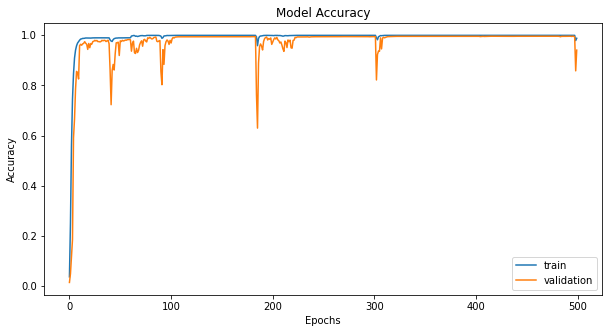

In [46]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.show()

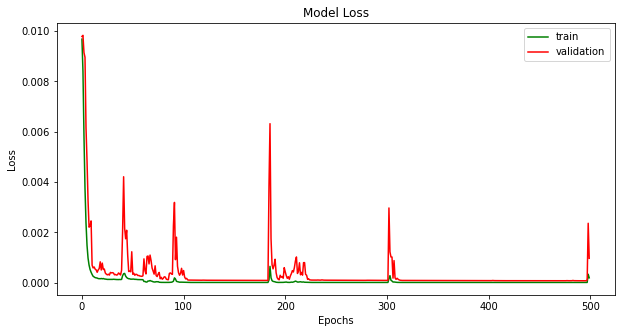

In [47]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], color = 'g')
plt.plot(history.history['val_loss'], color = 'r')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# l

In [48]:
data_total = pd.read_csv('/content/drive/MyDrive/dataset3/total_low.csv', header=None)

In [49]:
data_total=data_total.sample(frac=1)

In [50]:
data_train=data_total.iloc[0:24000, :]
data_val=data_total.iloc[24000:30000, :]
data_test=data_total.iloc[30000:36000,:]

In [51]:
y_train = to_categorical(data_train[256])
y_test = to_categorical(data_test[256])
y_val = to_categorical(data_val[256])

In [52]:
data_train.drop([256], axis=1, inplace=True)
data_test.drop([256], axis=1, inplace=True)
data_val.drop([256], axis=1, inplace=True)
data_train

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
32500,1.601186,1.600159,1.598626,1.596740,1.594769,1.593020,1.591749,1.591086,1.591011,1.591364,...,1.532523,1.535697,1.541887,1.552119,1.566526,1.584038,1.602304,1.617914,1.626908,1.625504
26674,1.288246,1.275948,1.265625,1.258397,1.254767,1.254392,1.256037,1.257738,1.257226,1.252535,...,1.538684,1.543718,1.548329,1.552719,1.557147,1.561835,1.566872,1.572152,1.577340,1.581896
27619,1.764385,1.772786,1.782340,1.792672,1.803143,1.812965,1.821362,1.827715,1.831659,1.833122,...,1.690840,1.674438,1.658712,1.643692,1.629388,1.615845,1.603182,1.591610,1.581409,1.572875
26260,1.585078,1.578245,1.569085,1.559806,1.553565,1.553952,1.564231,1.586519,1.621044,1.665723,...,1.697758,1.705833,1.713391,1.719931,1.725157,1.729040,1.731801,1.733841,1.735620,1.737546
7818,1.844298,1.831876,1.819284,1.806333,1.792905,1.778963,1.764530,1.749669,1.734471,1.719059,...,1.721473,1.714132,1.705796,1.696956,1.688052,1.679450,1.671408,1.664065,1.657447,1.651492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305,1.911443,1.878723,1.823769,1.754408,1.680416,1.611605,1.555999,1.518536,1.500537,1.499991,...,1.607699,1.604042,1.600477,1.597364,1.595091,1.593959,1.594075,1.595318,1.597360,1.599751
19463,1.783849,1.784982,1.783802,1.780799,1.776626,1.771965,1.767416,1.763424,1.760239,1.757911,...,1.857937,1.851872,1.843770,1.835352,1.828210,1.823342,1.820816,1.819674,1.818105,1.813908
31515,1.577244,1.578468,1.579900,1.581179,1.581978,1.582089,1.581476,1.580283,1.578787,1.577318,...,1.577342,1.577568,1.577719,1.577917,1.578291,1.578945,1.579948,1.581319,1.583045,1.585098
29247,1.640087,1.646111,1.644730,1.638594,1.630639,1.623459,1.618899,1.617901,1.620573,1.626395,...,1.641181,1.631222,1.623212,1.616664,1.611177,1.606507,1.602586,1.599500,1.597403,1.596411


In [53]:
X_train=data_train.values
X_test=data_test.values
X_val=data_val.values

In [54]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(24000, 256)
(6000, 256)
(6000, 256)
(24000, 101)
(6000, 101)
(6000, 101)


In [55]:
X_train = X_train.reshape(24000, 256, 1)
X_test = X_test.reshape(6000, 256, 1)
X_val = X_val.reshape(6000, 256, 1)
X_train.shape, X_test.shape, X_val.shape

((24000, 256, 1), (6000, 256, 1), (6000, 256, 1))

In [56]:
def model():
  model = Sequential()
  model.add(Conv1D(256, 8, padding='same', activation='relu', input_shape= (256,1)))
  model.add(MaxPooling1D())
  model.add(Conv1D(256, 8, padding='same', activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same',activation='relu'))
  model.add(MaxPooling1D())
  model.add(Conv1D(64, 8, padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(101, activation='softmax')) # activation='softmax'

  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

In [57]:
model = model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 256, 256)          2304      
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 128, 256)         0         
 1D)                                                             
                                                                 
 conv1d_13 (Conv1D)          (None, 128, 256)          524544    
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 64, 256)          0         
 g1D)                                                            
                                                                 
 conv1d_14 (Conv1D)          (None, 64, 64)            131136    
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 32, 64)          

In [58]:
history = model.fit(X_train, y_train, batch_size = 450, epochs = 500, verbose = 1, validation_data=(X_val, y_val))

Epoch 1/500
54/54 [==============================] - 5s 77ms/step - loss: 0.0098 - accuracy: 0.0136 - val_loss: 0.0098 - val_accuracy: 0.0110
Epoch 2/500
54/54 [==============================] - 4s 73ms/step - loss: 0.0098 - accuracy: 0.0222 - val_loss: 0.0098 - val_accuracy: 0.0228
Epoch 3/500
54/54 [==============================] - 4s 73ms/step - loss: 0.0097 - accuracy: 0.0382 - val_loss: 0.0099 - val_accuracy: 0.0098
Epoch 4/500
54/54 [==============================] - 4s 73ms/step - loss: 0.0095 - accuracy: 0.0832 - val_loss: 0.0102 - val_accuracy: 0.0138
Epoch 5/500
54/54 [==============================] - 4s 74ms/step - loss: 0.0091 - accuracy: 0.1570 - val_loss: 0.0117 - val_accuracy: 0.0192
Epoch 6/500
54/54 [==============================] - 4s 74ms/step - loss: 0.0087 - accuracy: 0.2330 - val_loss: 0.0111 - val_accuracy: 0.0180
Epoch 7/500
54/54 [==============================] - 4s 74ms/step - loss: 0.0082 - accuracy: 0.2975 - val_loss: 0.0116 - val_accuracy: 0.0245
Epoch 

In [59]:
model.save('lowpass.h5')

In [60]:
model.evaluate(X_test, y_test)

188/188 [==============================] - 1s 4ms/step - loss: 3.6210e-04 - accuracy: 0.9778


[0.0003620993811637163, 0.9778333306312561]

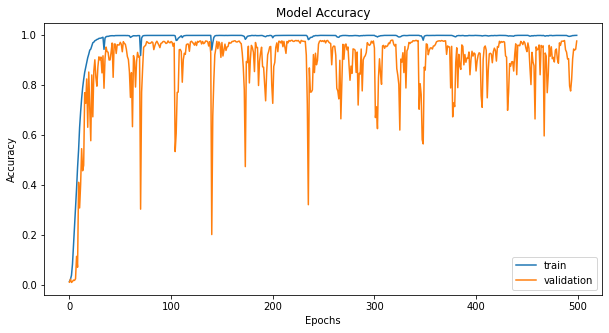

In [61]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='best')
plt.show()

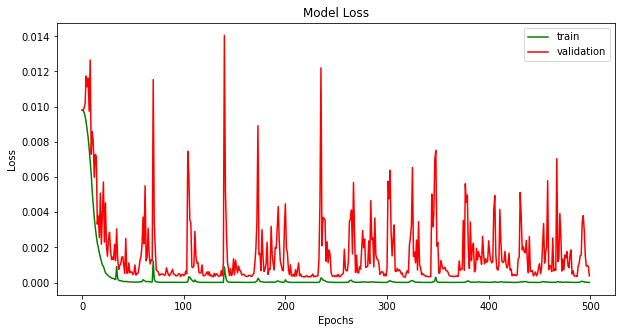

In [62]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], color = 'g')
plt.plot(history.history['val_loss'], color = 'r')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc='best')
plt.show()